In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header
                 =None,sep='\s+')#separate whitespace
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
              'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


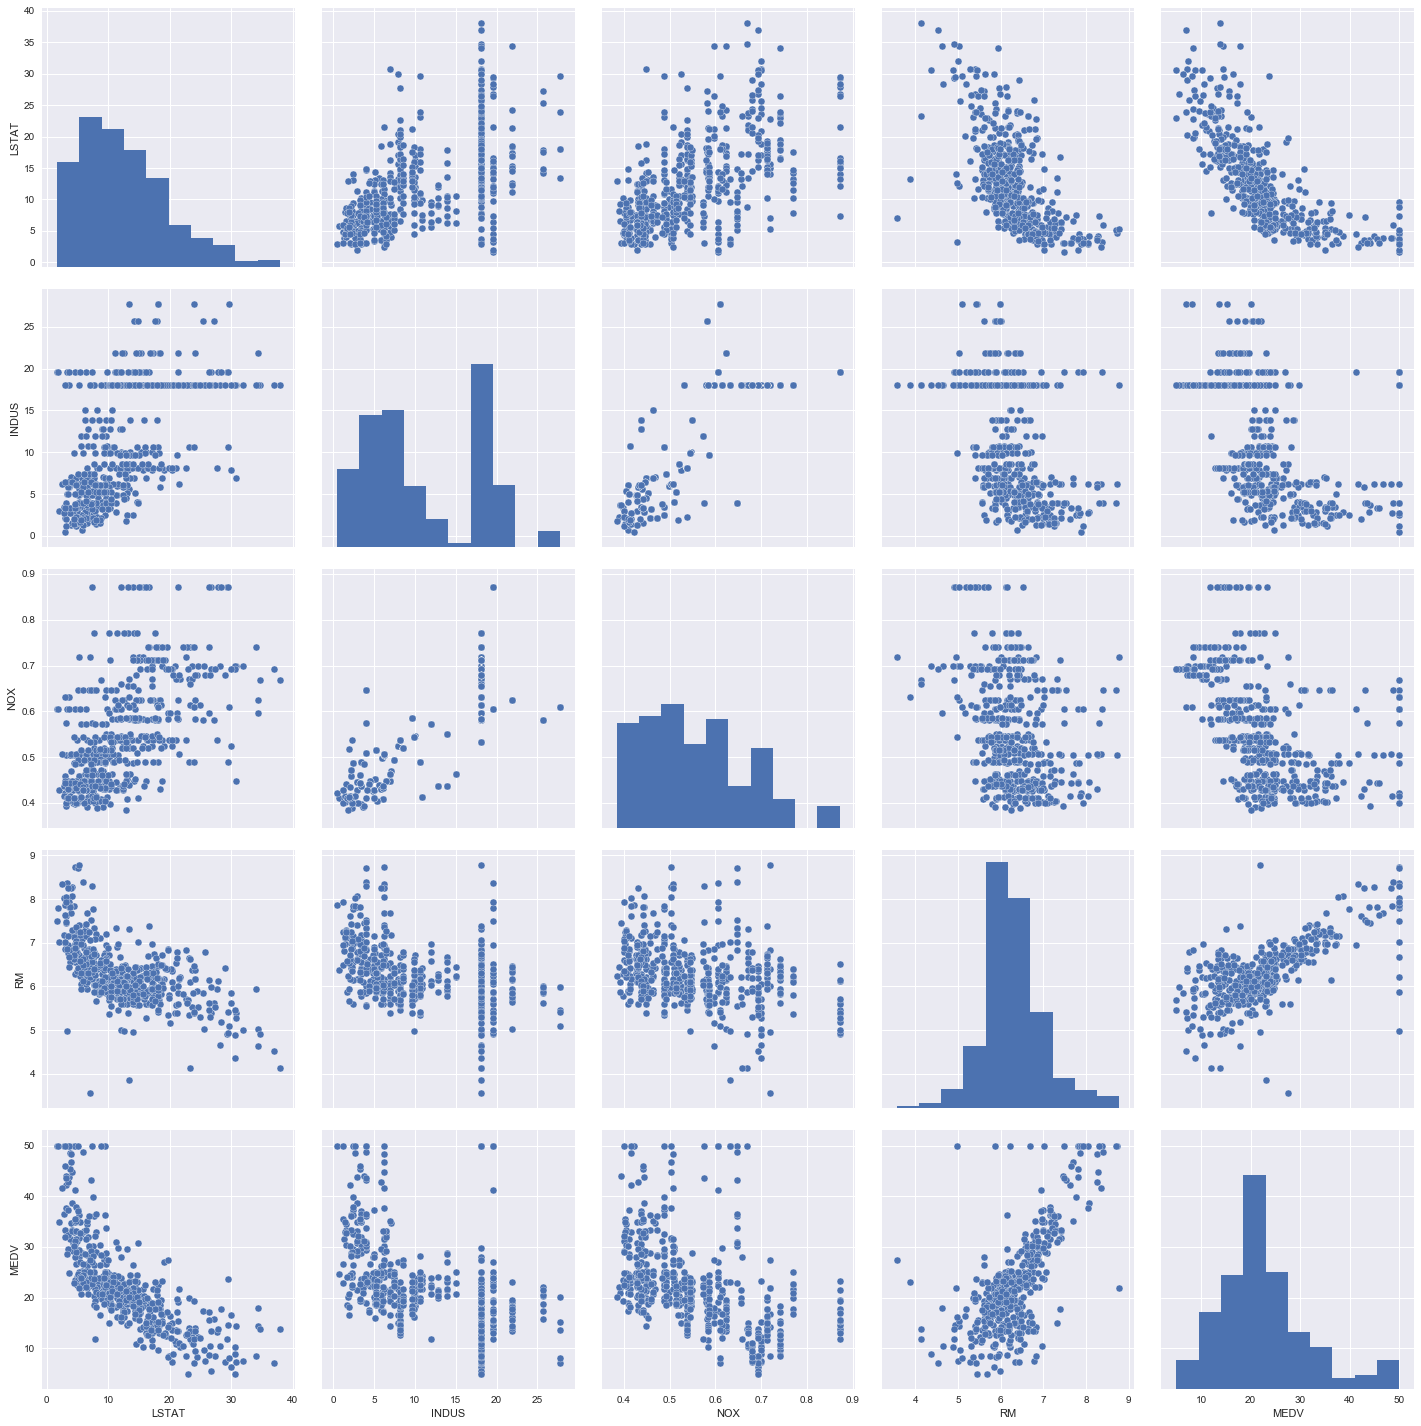

In [2]:
# target_label: MEDV 平均價格
# 13 features
# The relation btw target and 13 features
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=4)
plt.show()

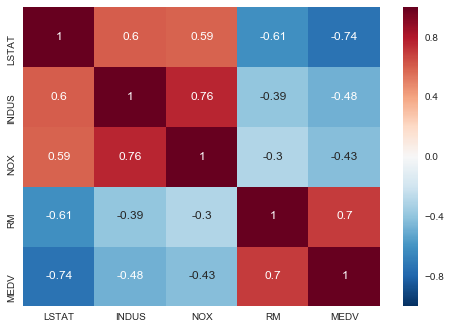

In [3]:
import numpy as np
#Pearson's r 衡量兩兩特徵間的線性依賴關係
cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm,xticklabels=cols,yticklabels=cols,annot=True)

plt.show()

In [4]:
df[cols].values.T

array([[  4.98 ,   9.14 ,   4.03 , ...,   5.64 ,   6.48 ,   7.88 ],
       [  2.31 ,   7.07 ,   7.07 , ...,  11.93 ,  11.93 ,  11.93 ],
       [  0.538,   0.469,   0.469, ...,   0.573,   0.573,   0.573],
       [  6.575,   6.421,   7.185, ...,   6.976,   6.794,   6.03 ],
       [ 24.   ,  21.6  ,  34.7  , ...,  23.9  ,  22.   ,  11.9  ]])

從上圖可知，RM and LSTAT 與 MEDV 相關性較大

從PairPlot 可知 LSTAT 與 MEDV 為非線性關係

RM 與 MEDV 為線性關係

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor
#引入正則化降低過擬合現象
#多變數回歸模型
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
#X = df[['RM']].values
#y = df['MEDV'].values

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

#多變量回歸
X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [72]:
pipe_lr = Pipeline([('stds',StandardScaler()),('lr',LinearRegression())])
#引入正則化降低過擬合現象
pipe_lasso = Pipeline([('stds',StandardScaler()),('lasso',Lasso(alpha=1.0))])
#pipe_ransac = Pipeline([('stds',StandardScaler()),('ransac',RANSACRegressor())])

pipe_lr.fit(X_train,y_train)
train_pred = pipe_lr.predict(X_train)
test_pred = pipe_lr.predict(X_test)

#print pipe_lr.steps[1][1].coef_
#print pipe_lr.steps[1][1].intercept_

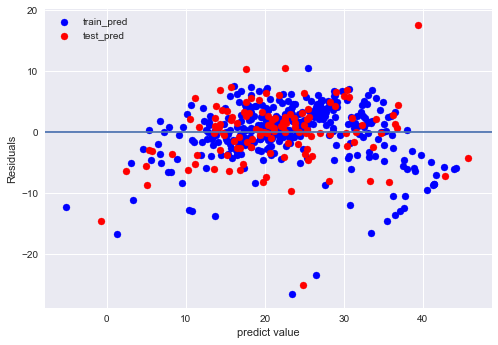

In [73]:
#殘差圖
plt.scatter(train_pred,train_pred-y_train,c='blue',label='train_pred')
plt.scatter(test_pred,test_pred-y_test,c='red',label='test_pred')
plt.xlabel('predict value')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.legend()
plt.show()

In [69]:
'''
pipe_ransac.fit(X,y)
pred_ransac = pipe_ransac.predict(X)
inlier_mask = pipe_ransac.steps[1][1].inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
plt.scatter(X[inlier_mask],y[inlier_mask],c='lightgreen',marker='s',label='inlier')
plt.scatter(X[outlier_mask],y[outlier_mask],c='lightblue',marker='o',label='outlier')
plt.plot(X,pred_ransac,c='red')
plt.xlabel('RM(std)')
plt.ylabel('MEDV(std)')
plt.legend()
plt.show()
'''

"\npipe_ransac.fit(X,y)\npred_ransac = pipe_ransac.predict(X)\ninlier_mask = pipe_ransac.steps[1][1].inlier_mask_\noutlier_mask = np.logical_not(inlier_mask)\nplt.scatter(X[inlier_mask],y[inlier_mask],c='lightgreen',marker='s',label='inlier')\nplt.scatter(X[outlier_mask],y[outlier_mask],c='lightblue',marker='o',label='outlier')\nplt.plot(X,pred_ransac,c='red')\nplt.xlabel('RM(std)')\nplt.ylabel('MEDV(std)')\nplt.legend()\nplt.show()\n"

In [70]:
print 'MSE of train_pred:', mean_squared_error(y_train,train_pred)
print 'MSE of test_pred:', mean_squared_error(y_test,test_pred)

MSE of train_pred: 21.0935656585
MSE of test_pred: 25.1392365204


In [71]:
print 'R2 of train_pred:', r2_score(y_train,train_pred)
print 'R2 of test_pred:',r2_score(y_test,test_pred)

R2 of train_pred: 0.755054885924
R2 of test_pred: 0.675795501453


In [ ]:
#引入正則化降低過擬合現象
pipe_lasso = Pipeline([('stds',StandardScaler()),('lasso',Lasso())])

### 多項式回歸 

對於不符合線性假設的問題-> 多項式回歸

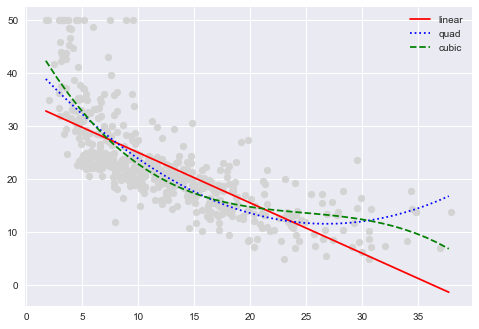

In [104]:
from sklearn.preprocessing import PolynomialFeatures
reg = LinearRegression()
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

#LSTAT v.s. MEDV
X = df[['LSTAT']].values
y = df['MEDV'].values
#linear fit
X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]
reg.fit(X,y)
y_lin_fit = reg.predict(X_fit)
regr = reg.predict(X)

#quad fit
X_quad = quad.fit_transform(X)
reg.fit(X_quad,y)
y_quad_fit = reg.predict(quad.fit_transform(X_fit))
reg_quad = reg.predict(X_quad)
r2_qual = r2_score(y,reg_quad)

#cubic fit
X_cubic = cubic.fit_transform(X)
reg.fit(X_cubic,y)
y_cubic_fit = reg.predict(cubic.fit_transform(X_fit))
reg_cubic = reg.predict(X_cubic)
r2_cubic = r2_score(y,reg_cubic)
#plot results
plt.scatter(X,y,color='lightgray')
plt.plot(X_fit,y_lin_fit,c='red',linestyle='-',label='linear')
plt.plot(X_fit,y_quad_fit,c='blue',linestyle=':',label='quad')
plt.plot(X_fit,y_cubic_fit,c='green',linestyle='--',label='cubic')
plt.legend()
plt.show()